In [1]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
from scipy.stats import spearmanr 
import geopandas as gpd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
geomap = gpd.read_file('SA1_2016_AUST.shp')

In [3]:
data = pd.read_excel('sa1.xlsx')  

In [4]:
data

,SA1_7DIGIT,total_otherlanguagesporkerin house
0,4100101,0.162222
1,4100102,0.264398
2,4100103,0.126263
3,4100104,0.277296
4,4100105,0.181122
...,...,...
4240,4117433,0.019608
4241,4949999,0.121202
4242,4979991,0.000000
4243,4979992,0.000000


In [27]:
geomap1 = geomap[['SA1_7DIG16','geometry','GCC_NAME16']]

In [28]:
data.rename(columns={'SA1_7DIGIT':'SA1_7DIG16'},inplace= True)

In [29]:
data.rename(columns={'total_otherlanguagesporkerin house':'lang'},inplace= True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SA1_7DIG16  4245 non-null   int64  
 1   lang        4245 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 66.5 KB


In [31]:
geomap1['SA1_7DIG16']=geomap1['SA1_7DIG16'].astype(int) 

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
geomap1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57523 entries, 0 to 57522
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA1_7DIG16  57523 non-null  int64   
 1   geometry    57490 non-null  geometry
 2   GCC_NAME16  57523 non-null  object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 1.3+ MB


In [33]:
geomap1['GCC_NAME16']=geomap1['GCC_NAME16'].astype('str') 

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
geomap1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57523 entries, 0 to 57522
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA1_7DIG16  57523 non-null  int64   
 1   geometry    57490 non-null  geometry
 2   GCC_NAME16  57523 non-null  object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 1.3+ MB


In [38]:
geomap2 = geomap1.merge(data, on= 'SA1_7DIG16', how='outer')

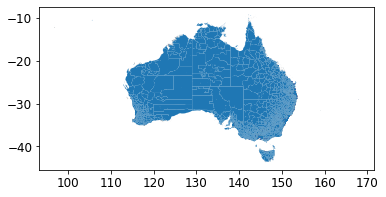

In [40]:
geomap2.plot()

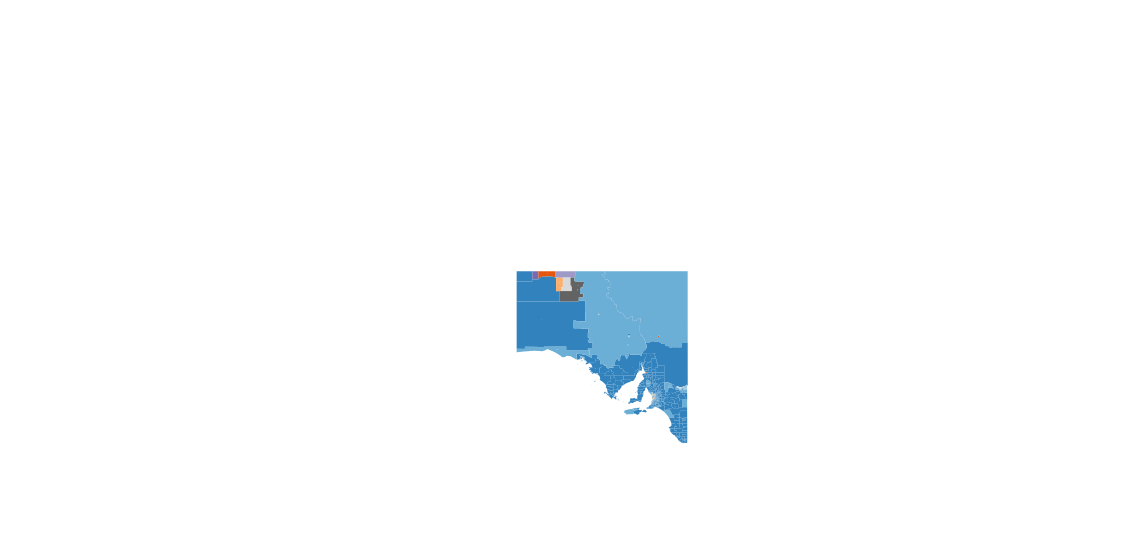

In [45]:
# plot the results
f, ax = plt.subplots(1,figsize=(20,15))
ax = geomap2.plot(ax=ax,column='lang',cmap = 'tab20c',legend= False)
ax.set_axis_off()

# to plot annotation
#n_geo_map.apply(lambda x: ax.annotate(s=x.state, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
#ax.set_title('Number of deaths in each states', fontdict={'fontsize':'25', 'fontweight' : '3'})
plt.show()